In [ ]:

import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

Saving hingconvoupdated.csv to hingconvoupdated.csv


In [ ]:
import pandas as pd
# Load the dataset (Update the filename if needed)
df = pd.read_csv("hingconvoupdated.csv")

# Display first few rows
df.head()

,Conversation
0,Hey Radhika! Kaisi ho?
1,"Hey Rohan, main bilkul thik hun. Tu bata, kais..."
2,"I'm good too, yaar. Tumne suna ki next week sc..."
3,"Haan, mujhe toh pata chal gaya hai. Itna excit..."
4,"Bilkul, Radhika. Ek trip miss karunga toh beha..."


In [ ]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply preprocessing to the conversation column
df["Conversation"] = df["Conversation"].astype(str).apply(preprocess_text)

# Display cleaned text
df.head()


,Conversation
0,hey radhika kaisi ho
1,hey rohan main bilkul thik hun tu bata kaisa hai
2,im good too yaar tumne suna ki next week schoo...
3,haan mujhe toh pata chal gaya hai itna excited...
4,bilkul radhika ek trip miss karunga toh behad ...


In [ ]:

#PREPROCESS
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply preprocessing to the conversation column
df["Conversation"] = df["Conversation"].astype(str).apply(preprocess_text)

# Display cleaned text
df.head()


,Conversation
0,hey radhika kaisi ho
1,hey rohan main bilkul thik hun tu bata kaisa hai
2,im good too yaar tumne suna ki next week schoo...
3,haan mujhe toh pata chal gaya hai itna excited...
4,bilkul radhika ek trip miss karunga toh behad ...


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Conversation"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["Conversation"])


In [ ]:
# 🚀 Step 4: Prepare Input-Output Data Efficiently
input_sequences = []
output_words = []

# Set a limit on sequence length to prevent memory overload
max_seq_length = 50  # Adjust based on available RAM

for sequence in sequences:
    for i in range(1, min(len(sequence), max_seq_length)):  # Limit sequence expansion
        input_sequences.append(sequence[:i])
        output_words.append(sequence[i])  # Predict the next word

In [ ]:
# 🚀 Step 5: Pad Sequences and Convert Output to Sparse Labels
max_sequence_length = max(len(seq) for seq in input_sequences)  # Find max length for padding

X = pad_sequences(input_sequences, maxlen=max_sequence_length, padding="pre")
y = np.array(output_words)  # Use integer encoding instead of one-hot encoding

In [ ]:
"""
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Save processed data to avoid recomputation
np.save("X.npy", X)
np.save("y.npy", y)
"""

# 🚀 Step 6: Implement 5-Fold Cross-Validation

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}: Train size={len(train_idx)}, Validation size={len(val_idx)}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Save fold-specific data
    np.save(f"X_train_fold{fold+1}.npy", X_train)
    np.save(f"y_train_fold{fold+1}.npy", y_train)
    np.save(f"X_val_fold{fold+1}.npy", X_val)
    np.save(f"y_val_fold{fold+1}.npy", y_val)


Fold 1: Train size=146528, Validation size=36633
Fold 2: Train size=146529, Validation size=36632
Fold 3: Train size=146529, Validation size=36632
Fold 4: Train size=146529, Validation size=36632
Fold 5: Train size=146529, Validation size=36632


# **Why K-Fold Cross-Validation✅ is Better Than a Static 80-20 Split?**


1.   **More Reliable Performance Estimates:**
In 80-20 split, the model is trained & tested on just one split, which might not represent the dataset well.
K-Fold (e.g., 5-Fold) trains the model 5 times on different splits, averaging results for better accuracy.
2.   **Utilizes More Data for Training:**
80-20 split: 80% of data is used for training, 20% is left for validation.
K-Fold (e.g., 5-Fold): Each fold uses 80% for training but across different subsets, ensuring that every sample gets a chance to be in validation at least once.
3. **Reduces Bias from a Single Split:**
In 80-20 split, if the validation set happens to be too easy or too hard, the model evaluation is skewed.
K-Fold ensures all data points contribute to training & testing, leading to more stable results.
4. **Avoids Overfitting on One Split:**
80-20 split risks overfitting if the training set contains biased patterns.
K-Fold reduces this risk since the model is validated on multiple different validation sets.
5. **Works Better on Smaller Datasets:**
If your dataset is small, an 80-20 split means losing 20% of valuable data.
K-Fold maximizes training data usage, leading to better learning.

✅ *Use K-Fold Cross-Validation for more robust, unbiased model evaluation.*

In [ ]:
# 🚀 Step 7: Define Optimized LSTM Model
vocab_size = len(tokenizer.word_index) + 1  # Total unique words
embedding_dim = 100  # Word vector size
lstm_units = 256  # LSTM cell size

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=lstm_units, return_sequences=False),
    Dense(units=vocab_size, activation="softmax")
])

# Compile model using sparse categorical crossentropy to reduce memory usage
lstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# 🚀 Step 8: Train the Model with Smaller Batch Size


Epoch 1/2
4580/4580 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.0641 - loss: 6.7419 - val_accuracy: 0.1405 - val_loss: 5.5936
Epoch 2/2
4580/4580 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.1599 - loss: 5.1904 - val_accuracy: 0.1798 - val_loss: 5.2422


In [ ]:
lstm_model.save("hinglish_lstm_model.keras")

In [ ]:
# 🚀 Step 10: Function to Predict the Next Word
def predict_next_word(input_text, tokenizer, model, max_sequence_length):
    input_text = preprocess_text(input_text)  # Apply preprocessing
    sequence = tokenizer.texts_to_sequences([input_text])[0]  # Tokenize input
    sequence = pad_sequences([sequence], maxlen=max_sequence_length, padding="pre")  # Pad sequence

    predicted_index = np.argmax(lstm_model.predict(sequence), axis=-1)  # Get most probable word index
    predicted_word = tokenizer.index_word.get(predicted_index[0], "")  # Convert index to word

    return predicted_word

In [ ]:
# 🚀 Step 11: Prompt User Input and Predict Top 3 Next Words
def predict_top_words(input_text, tokenizer, model, max_sequence_length, top_n=3):
    input_text = preprocess_text(input_text)  # Apply preprocessing
    sequence = tokenizer.texts_to_sequences([input_text])[0]  # Tokenize input
    sequence = pad_sequences([sequence], maxlen=max_sequence_length, padding="pre")  # Pad sequence

    predictions = model.predict(sequence)[0]  # Get probability distribution
    top_indices = np.argsort(predictions)[-top_n:][::-1]  # Get top N word indices

    top_words = [tokenizer.index_word.get(idx, "") for idx in top_indices]  # Convert indices to words

    return top_words

# Prompt user for input text
input_text = input("Enter a Hinglish phrase: ")

# Predict top 3 most probable next words
predicted_words = predict_top_words(input_text, tokenizer, lstm_model, max_sequence_length)
print(f"Predicted next words: {predicted_words}")


Enter a Hinglish phrase: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted next words: ['rahul', 'priya', 'rohan']


In [ ]:
#Step 12: Implement BiLSTM & GRU Models
from tensorflow.keras.layers import Bidirectional

# 🚀 Define BiLSTM Model
bilstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(units=lstm_units, return_sequences=False)),  # Bidirectional LSTM
    Dense(units=vocab_size, activation="softmax")
])

# Compile the BiLSTM model
bilstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 🚀 Train the BiLSTM Model


# Save the BiLSTM Model



Epoch 1/2
4579/4579 ━━━━━━━━━━━━━━━━━━━━ 66s 14ms/step - accuracy: 0.0705 - loss: 6.6195 - val_accuracy: 0.1463 - val_loss: 5.5097
Epoch 2/2
4579/4579 ━━━━━━━━━━━━━━━━━━━━ 86s 15ms/step - accuracy: 0.1664 - loss: 5.1174 - val_accuracy: 0.1837 - val_loss: 5.2049


In [ ]:
# implement GRU
from tensorflow.keras.layers import GRU

# 🚀 Define GRU Model
gru_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    GRU(units=lstm_units, return_sequences=False),  # GRU Layer
    Dense(units=vocab_size, activation="softmax")
])

# Compile the GRU model
gru_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 🚀 Train the GRU Model

# Save the GRU Model


Epoch 1/2
4579/4579 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.0756 - loss: 6.6277 - val_accuracy: 0.1651 - val_loss: 5.3865
Epoch 2/2
4579/4579 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.1879 - loss: 4.9139 - val_accuracy: 0.1944 - val_loss: 5.1037


In [ ]:
import os
print(os.listdir())  # This lists all files in your notebook environment


['.config', 'hinglish_gru_model.keras', 'hingconvoupdated.csv', 'y.npy', 'hinglish_lstm_model.keras', 'X.npy', 'hinglish_bilstm_model.keras', 'sample_data']


In [ ]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

# Save models
lstm_model.save("hinglish_lstm_model.keras")
bilstm_model.save("hinglish_bilstm_model.keras")
gru_model.save("hinglish_gru_model.keras")

print("Files saved successfully!")


from google.colab import files  # Only for Colab

files.download("tokenizer.pkl")
files.download("hinglish_lstm_model.keras")
files.download("hinglish_bilstm_model.keras")
files.download("hinglish_gru_model.keras")





Files saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

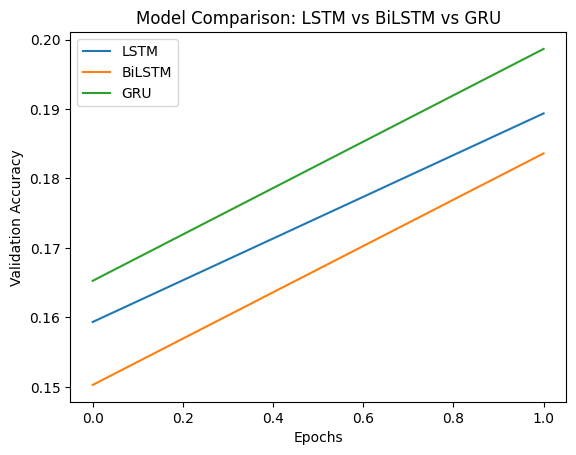

In [ ]:
#comparing the performance


In [ ]:
import os

# Get absolute paths of model files
print(os.path.abspath("hinglish_lstm_model.h5"))
print(os.path.abspath("hinglish_bilstm_model.h5"))
print(os.path.abspath("hinglish_gru_model.h5"))



/content/hinglish_lstm_model.h5
/content/hinglish_bilstm_model.h5
/content/hinglish_gru_model.h5


In [ ]:
#step 13
import numpy as np
from tensorflow.keras.models import load_model

# Load all trained models
lstm_model = load_model("hinglish_lstm_model.keras")
bilstm_model = load_model("hinglish_bilstm_model.keras")
gru_model = load_model("hinglish_gru_model.keras")

# 🚀 Function to Predict Next Words Using a Selected Model
def predict_next_words(input_text, model_choice, tokenizer, max_sequence_length, top_n=3):
    input_text = preprocess_text(input_text)  # Apply preprocessing
    sequence = tokenizer.texts_to_sequences([input_text])[0]  # Tokenize input
    sequence = pad_sequences([sequence], maxlen=max_sequence_length, padding="pre")  # Pad sequence

    # Convert user input to lowercase to make it case-insensitive
    model_choice = model_choice.strip().lower()

    # Select model based on user input
    if model_choice == "lstm":
        model = lstm_model
    elif model_choice == "bilstm":
        model = bilstm_model
    elif model_choice == "gru":
        model = gru_model
    else:
        print("Invalid model choice! Using LSTM by default.")
        model = lstm_model

    predictions = model.predict(sequence)[0]  # Get probability distribution
    top_indices = np.argsort(predictions)[-top_n:][::-1]  # Get top N word indices

    top_words = [tokenizer.index_word.get(idx, "") for idx in top_indices]  # Convert indices to words

    return top_words

# 🚀 User Prompt to Select Model and Input Text
model_choice = input("Choose a model (LSTM / BiLSTM / GRU): ").strip().lower()
input_text = input("Enter a Hinglish phrase: ")

# Predict using the chosen model
predicted_words = predict_next_words(input_text, model_choice, tokenizer, max_sequence_length)
print(f"Predicted next words using {model_choice.upper()}: {predicted_words}")


Choose a model (LSTM / BiLSTM / GRU): gru
Enter a Hinglish phrase: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted next words using GRU: ['rahul', 'rohan', 'riya']


In [ ]:
import pickle

with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
git version 2.34.1


Cloning into 'Contextual-Word-Prediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 51.21 KiB | 8.54 MiB/s, done.


/content/Contextual-Word-Prediction


Switched to a new branch 'add-transformers'


* add-transformers
  main


In [ ]:
#step 14





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Map:   0%|          | 0/9999 [00:00<?, ? examples/s]

ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

# **More Insights into Dataset Analysis**

*   Added POS tagging (nltk.pos_tag()).
*   Generated a bar chart for most frequent words.
*   Computed dataset statistics (unique words, sentence lengths, etc.).



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is 

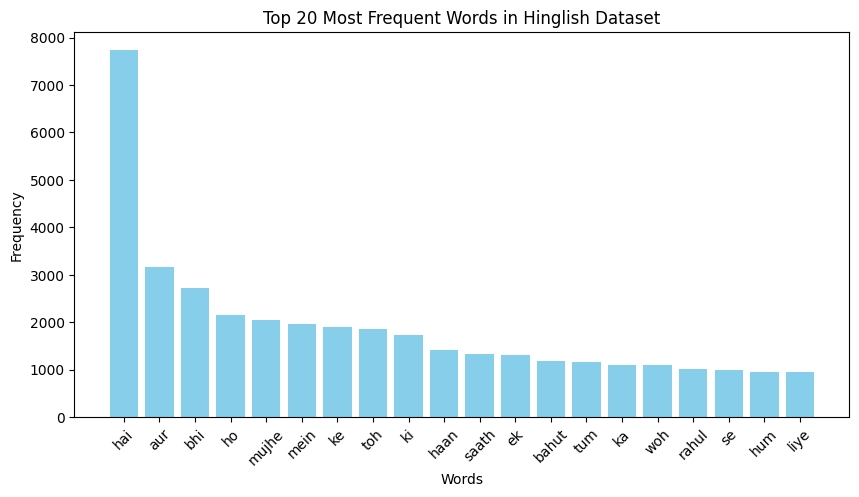

The total number of unique words in the dataset:  9421
Average sentence length in the dataset:  23.503150315031505


In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download('punkt_tab')
nltk.download('all')



# Assuming dataset has a column named 'text' containing Hinglish sentences
if "Conversation" in df.columns:
    text_data = df["Conversation"].dropna().tolist()
else:
    raise ValueError("Dataset does not contain a 'Conversation' column.")

# Tokenization and POS Tagging
stop_words = set(stopwords.words("english"))
all_words = [word.lower() for sentence in text_data for word in word_tokenize(sentence) if word.isalpha() and word.lower() not in stop_words]
pos_tags = nltk.pos_tag(all_words)

# Word Frequency Analysis
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

# Dataset Statistics
num_unique_words = len(set(all_words))
avg_sentence_length = sum(len(word_tokenize(sentence)) for sentence in text_data) / len(text_data)

# Plot the Most Frequent Words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Hinglish Dataset")
plt.show()

# Display dataset statistics
print("The total number of unique words in the dataset: ", num_unique_words)
print("Average sentence length in the dataset: ", avg_sentence_length)

